# Challenge 5.5.4

Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


According to the codebook, 6 is 2012 and 7 is 2014.

In [4]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [5]:
df = df.dropna()

## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

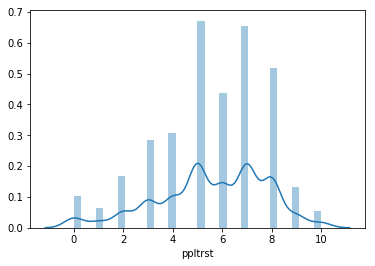

In [6]:
sns.distplot( df["ppltrst"])

The ppltrst histogram looks roughly normal, though we are looking at ranking data, not continuous data.  

We could use a pairwise t-test, since there seems to be survey respondesnts in 2012 that also responded in 2014.  However, if a respondent doesn't respond to both surveys, we lose that data.  So we will just use a t-test 

In [7]:
cntry_list = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

for c in cntry_list:
    print(c + ':')
    print(stats.ttest_ind(df.loc[(df['cntry'] == c) & (df['year'] == 6)].ppltrst, 
                          df.loc[(df['cntry'] == c) & (df['year'] == 7)].ppltrst))

CH:
Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)
CZ:
Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)
DE:
Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)
ES:
Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)
NO:
Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131978)
SE:
Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)


We have two signficant p-values for Estonia and Sweden.  Estonians became more trusting between 2012 and 2014 and Swedes became less trusting.

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [8]:
for c in cntry_list:
    print(c + ':')
    print(stats.ttest_ind(df.loc[(df['cntry'] == c) & (df['year'] == 6)].happy, 
                          df.loc[(df['cntry'] == c) & (df['year'] == 7)].happy))

CH:
Ttest_indResult(statistic=-0.812142488327401, pvalue=0.4168411011770018)
CZ:
Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238)
DE:
Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073)
ES:
Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369)
NO:
Ttest_indResult(statistic=4.152957205997266, pvalue=3.4778681704487346e-05)
SE:
Ttest_indResult(statistic=-0.5372790210326394, pvalue=0.5911442306272388)


Norway has a significant pvalue.  We have evidence that Norweigens are happier in 2014 compared to 2012. 

## Who reported watching more TV in 2012, men or women?
1 is male and 2 is female in the dataset.

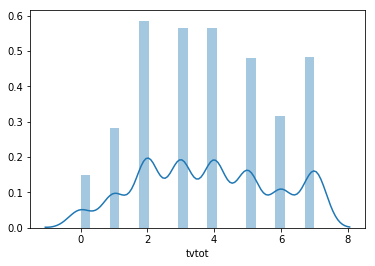

In [9]:
sns.distplot( df["tvtot"])

In [10]:
 print(stats.ttest_ind(df.loc[(df['gndr'] == 1)].tvtot, 
                          df.loc[(df['gndr'] == 2)].tvtot))

Ttest_indResult(statistic=-1.6176926106407103, pvalue=0.10576758143732026)


With a pvalue of 0.105, we don't have enough evidence to reject the null that there is no difference between men and women's tv watching.

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In the partner column, 1 means living with partner and 2 means not living with partner. 

In [11]:
print(stats.ttest_ind(df.loc[(df['partner'] == 1) & (df['year'] == 6)].pplfair, 
                          df.loc[(df['partner'] == 2) & (df['year'] == 6)].pplfair))

Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)


The pvalue is significant here.  People who are living with a partner is more likely to believe people were fair in 2012 than people living alone.

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Let's first look at the boxplot

In [12]:
df2=df.loc[df['cntry'].isin(['CH','CZ','ES']) & (df['year'] == 6)]

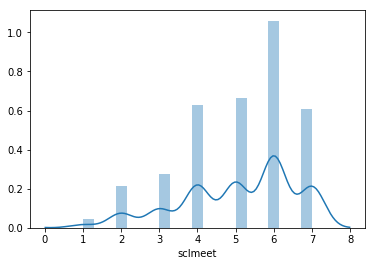

In [13]:
sns.distplot( df2["sclmeet"])

Plot looks roughly normal.

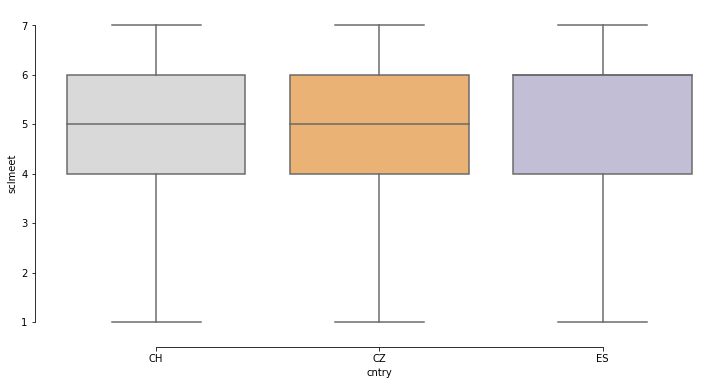

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x="cntry", y="sclmeet", data=df2, palette="Set3_r")
sns.despine(offset=10, trim=True)

They all look the same.

In [15]:
F, p = stats.f_oneway(
    df.loc[(df['cntry'] == 'CH') & (df['year'] == 7)].sclmeet,
    df.loc[(df['cntry'] == 'CZ') & (df['year'] == 7)].sclmeet,
    df.loc[(df['cntry'] == 'ES') & (df['year'] == 7)].sclmeet)

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

63.151657307073876
1.774754769196842e-27


p-value is very low, indicating that there is a significant difference between how many times people in China, Czech Republic and Denmark meet.  This is different than I would have expected from the boxplots.

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df2['sclmeet'],      # Data
                          groups=df2['cntry'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.3922,-0.5844,-0.2,True
CH,ES,0.0976,-0.0673,0.2625,False
CZ,ES,0.4898,0.3143,0.6654,True


Running the Tukey test, we can see where the difference lies. It looks like China and Czech Republic have significantly different social meeting patterns, and Czech is different from Estonians.  The differences between China and Estonia are not significant enough to reject the null hypothesis.

### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

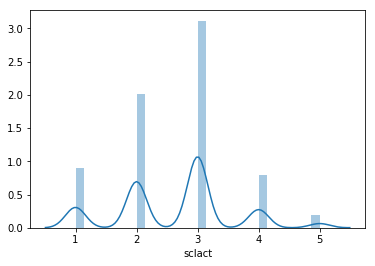

In [17]:
sns.distplot( df2["sclact"])

In [18]:
df2['age_grp'] = pd.cut(df2['agea'], [0, 35, 45, 55, 65, 75, 150], labels=['0-35'
                            ,'36-45','46-55','56-65','66-75','76+'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Let's look at China first.

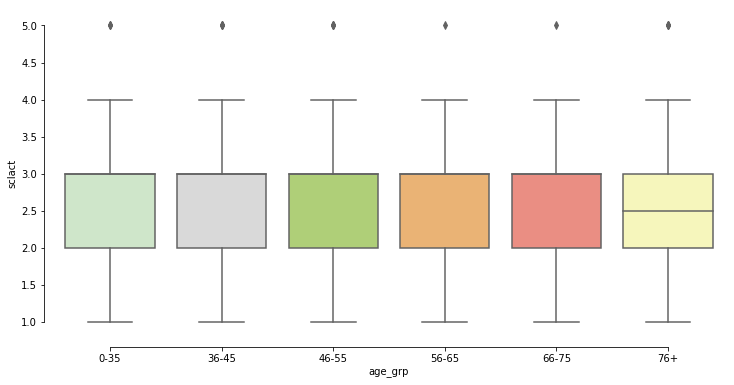

In [19]:
ch = df2.loc[df2['cntry']=='CH']

plt.figure(figsize=(12,6))
sns.boxplot(x="age_grp", y="sclact", data= ch, palette="Set3_r")
sns.despine(offset=10, trim=True)

In [20]:
tukey = pairwise_tukeyhsd(endog=ch['sclact'],      # Data
                          groups=ch['age_grp'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary() 

group1,group2,meandiff,lower,upper,reject
0-35,36-45,-0.1503,-0.4271,0.1264,False
0-35,46-55,-0.0025,-0.2799,0.2749,False
0-35,56-65,-0.0912,-0.3738,0.1914,False
0-35,66-75,-0.1779,-0.4979,0.1422,False
0-35,76+,-0.1136,-0.4911,0.2639,False
36-45,46-55,0.1479,-0.1651,0.4609,False
36-45,56-65,0.0592,-0.2584,0.3767,False
36-45,66-75,-0.0275,-0.3789,0.3238,False
36-45,76+,0.0367,-0.3676,0.4411,False
46-55,56-65,-0.0887,-0.4069,0.2295,False


No differences in social activity for age groups in China.

What about the Czech Republic?

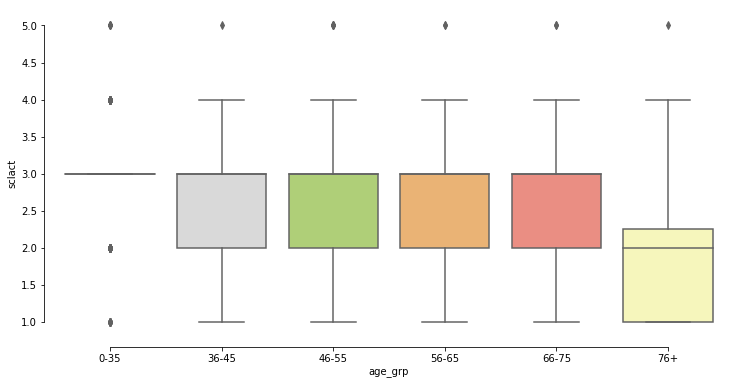

In [21]:
cz = df2.loc[df2['cntry']=='CZ']

plt.figure(figsize=(12,6))
sns.boxplot(x="age_grp", y="sclact", data= cz, palette="Set3_r")
sns.despine(offset=10, trim=True)

In [22]:
cz.age_grp.value_counts()

0-35     172
36-45    126
46-55    105
56-65    102
66-75     76
76+       20
Name: age_grp, dtype: int64

Older people look less likely to participate in social activities and people under the age of 36 tend to respond the same way.  This seems a little unbelievable to me...

In [23]:
tukey = pairwise_tukeyhsd(endog=cz['sclact'],      # Data
                          groups=cz['age_grp'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary() 

group1,group2,meandiff,lower,upper,reject
0-35,36-45,-0.3578,-0.6664,-0.0492,True
0-35,46-55,-0.3181,-0.644,0.0078,False
0-35,56-65,-0.4189,-0.7478,-0.0901,True
0-35,66-75,-0.3501,-0.7125,0.0124,False
0-35,76+,-0.7895,-1.4112,-0.1678,True
36-45,46-55,0.0397,-0.308,0.3874,False
36-45,56-65,-0.0612,-0.4117,0.2893,False
36-45,66-75,0.0077,-0.3745,0.3899,False
36-45,76+,-0.4317,-1.0652,0.2017,False
46-55,56-65,-0.1008,-0.4667,0.265,False


Most of the differences are with the 0-35 age group.  

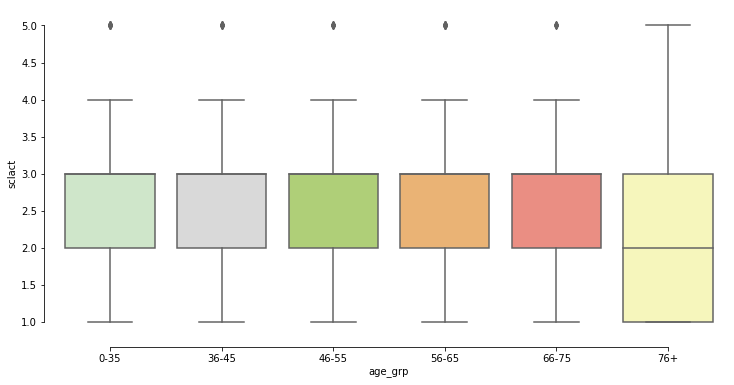

In [25]:
es = df2.loc[df2['cntry']=='ES']

plt.figure(figsize=(12,6))
sns.boxplot(x="age_grp", y="sclact", data= es, palette="Set3_r")
sns.despine(offset=10, trim=True)

In [27]:
es.age_grp.value_counts()

0-35     324
36-45    248
46-55    218
56-65    173
66-75    112
76+       83
Name: age_grp, dtype: int64

They all look pretty consistent except the older Estonians.  My guess is that the differences across the board are not significant.

In [28]:
tukey = pairwise_tukeyhsd(endog=es['sclact'],      # Data
                          groups=es['age_grp'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
0-35,36-45,-0.1135,-0.3471,0.1201,False
0-35,46-55,-0.0975,-0.3401,0.145,False
0-35,56-65,-0.0285,-0.2892,0.2323,False
0-35,66-75,0.0757,-0.2278,0.3792,False
0-35,76+,-0.2561,-0.5968,0.0845,False
36-45,46-55,0.016,-0.2411,0.273,False
36-45,56-65,0.085,-0.1893,0.3593,False
36-45,66-75,0.1892,-0.126,0.5045,False
36-45,76+,-0.1426,-0.4938,0.2085,False
46-55,56-65,0.069,-0.2129,0.351,False


Yep.